##Mean Shift

Meanshift is a clustering algorithm that assigns the datapoints to the clusters iteratively by shifting points towards the mode. The mode can be understood as the highest density of datapoints (in the region, in the context of the Meanshift). As such, it is also known as the mode-seeking algorithm. Meanshift algorithm has applications in the field of image processing and computer vision.

Given a set of datapoints, the algorithm iteratively assign each datapoint towards the closest cluster centroid. The direction to the closest cluster centroid is determined by where most of the points nearby are at. So each iteration each data point will move closer to where the most points are at, which is or will lead to the cluster center. When the algorithm stops, each point is assigned to a cluster.

Unlike the popular K-Means algorithm, meanshift does not require specifying the number of clusters in advance. The number of clusters is determined by the algorithm with respect to the data.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
import random

In [9]:
x=np.array([[1,2],
          [1.5,1.8],
          [5,8],
          [1,0.6],
          [9,11],
          [8,2],
          [10,2],
          [9,3]])
color=10*['g','r','c','b','k']

In [14]:
x

array([[ 1. ,  2. ],
       [ 1.5,  1.8],
       [ 5. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ],
       [ 8. ,  2. ],
       [10. ,  2. ],
       [ 9. ,  3. ]])

In [10]:
class Mean_shift:
    def __init__(self,radius=10):
        self.radius=radius
        
    def fit(self,data):
        #initializing a dictionary of centroids as empty
        centroids={}
        
        #initially we considering all points as centroids and take them in our centroids dictionary because, why not?
        #so now we have n centroids (where n is the number of points in data)
        #each group will have a key its value will be its centroid
        for i in range(len(data)):
            centroids[i]=data[i]
        
        #this loop will run until the values of centroids stops changing.
        #at each iteration the values of centroids will change, we'll compare these new values to the values from
        #the previous iteration and if they are same, the loop will break.
        #if previous_centroid==current_centroids then stop
        while True:
            
            #intializing a list to store our new centroids, that we'll get from this loop
            new_centroids=[]
            
            #now we will find the distance of each point with each centroid
            for group in centroids:
                
                #initializing a list to store the points that lie within the circle of given radius from a particular centroid
                #we will consider each centroid one-by-one from the dictionary centroids
                in_radius=[]
                
                #read this as, centroid=centroid of group n, eg: centroid = centroid of group 1
                centroid=centroids[group]
                
                #consider each point in the data one-by-one
                for point in data:
                    
                    #if the point lies inside the circle(distance is less than given radius) then append the point
                    #in the list in_radius
                    if np.linalg.norm(point-centroid)<=self.radius:
                        in_radius.append(point)
                
                #calculate new centroids by taking average of the points stored in in_radius list and then store them
                new_centroid=tuple(np.average(in_radius,axis=0))
                new_centroids.append(new_centroid)
            
            #now convert the new_centroid list to a set and sort them and store them
            #the sorting is done so that we can do accurate comparison further in the porgram
            uniques=sorted(list(set(new_centroids)))
            
            #previous centroids is saved as well
            prev_centroids=dict(centroids)
            
            #emptying our dictionary and then saving new key-value pairs in it
            centroids={}
            
            #putting each unique value in the dictionary, the key value correspond to the group
            for i in range(len(uniques)):
                centroids[i]=np.array(uniques[i])
             
            #set optimized to true
            optimized=True
            
            #read line 15
            for i in centroids:
                if(np.array_equal(centroids[i],prev_centroids[i]))!=True:
                    optimized=False
                    break
                    
            if optimized:
                break
                
        self.centroids=centroids
        return self.centroids
    
    def predict(self,data,point):
        distance=[]
        centroids=self.fit(data)
        plt.scatter(data[:,0],data[:,1],s=150)
        for c in centroids:
            plt.scatter(centroids[c][0],centroids[c][1], color='k',marker='*',s=150)
        plt.scatter(point[0],point[1],color='b',s=100,marker='o')
        plt.show
        for centroid in centroids:
            distance.append(np.linalg.norm(np.array(point)-centroid))
        return distance.index(min(distance))

<function matplotlib.pyplot.show(*args, **kw)>

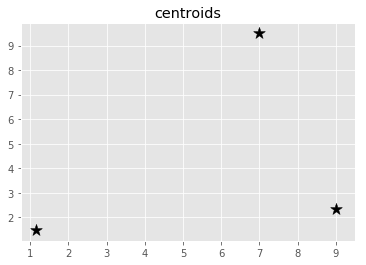

In [22]:
clc=Mean_shift(radius=5)
centroids=clc.fit(x)
for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1], color='k',marker='*',s=150)
plt.title('centroids')
plt.show

belongs to cluster:


2

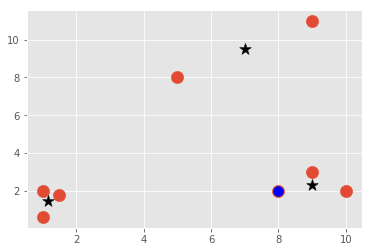

In [20]:
print('belongs to cluster:')
clc.predict(x,x[5])

belongs to cluster:


1

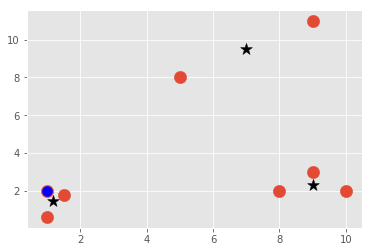

In [21]:
print('belongs to cluster:')

clc.predict(x,x[0])